# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Checking Shape of Data.
df.shape

(614, 13)

In [4]:
#Checking Data Types
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Here we are finding null values are present in our data or not. As we can see the null value are present  and we have to replace them.

In [6]:
df.drop(['Loan_ID'], axis = 1, inplace = True)

Droping Loan_ID column as we can see this column is not related with prediction it is only for loan applicant.

In [7]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Null values are present in many columns

In [8]:
pd.concat({'unique values': df.apply(pd.unique), 'number of unique values': df.nunique()}, axis=1)

,unique values,number of unique values
Gender,"[Male, Female, nan]",2
Married,"[No, Yes, nan]",2
Dependents,"[0, 1, 2, 3+, nan]",4
Education,"[Graduate, Not Graduate]",2
Self_Employed,"[No, Yes, nan]",2
ApplicantIncome,"[5849, 4583, 3000, 2583, 6000, 5417, 2333, 303...",505
CoapplicantIncome,"[0.0, 1508.0, 2358.0, 4196.0, 1516.0, 2504.0, ...",287
LoanAmount,"[nan, 128.0, 66.0, 120.0, 141.0, 267.0, 95.0, ...",203
Loan_Amount_Term,"[360.0, 120.0, 240.0, nan, 180.0, 60.0, 300.0,...",10
Credit_History,"[1.0, 0.0, nan]",2


Here we are finding all features unique values and how many unique values are there in each columns.

In [10]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [11]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [12]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [13]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [14]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [15]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [16]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [17]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [18]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

We are find all columns unique values separately and we can see in many of columns the null values are present.

# Removing NaN values

In [19]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['Gender']=imp.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married']=imp.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents']=imp.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Self_Employed']=imp.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df['Loan_Amount_Term']=imp.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))
df['Credit_History']=imp.fit_transform(df['Credit_History'].values.reshape(-1,1))

In [20]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="mean")
df['LoanAmount']=imp.fit_transform(df['LoanAmount'].values.reshape(-1,1))

In [21]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

After apply SimpleImputer as we can see there are no NaN values present.

# Data Visualization

# Univariate Analysis

Text(0.5, 1.0, 'Gender')

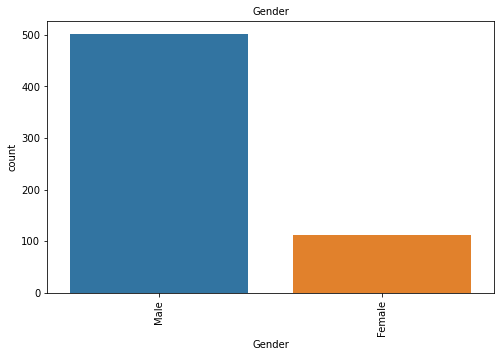

In [23]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Gender")
plt.xticks(rotation=90)
plt.title("Gender", fontsize = 10)

Male applicant are higher than Female applicant.

Text(0.5, 1.0, 'Married')

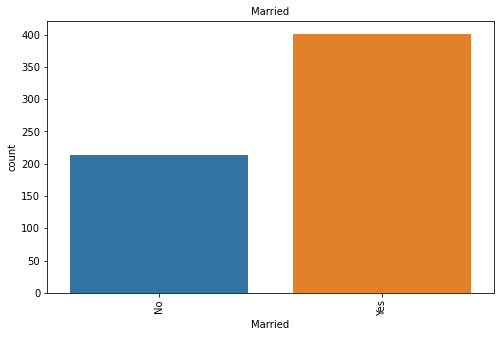

In [24]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Married")
plt.xticks(rotation=90)
plt.title("Married", fontsize = 10)

According to given loan data Married people are higher than Unmarried.

Text(0.5, 1.0, 'Dependents')

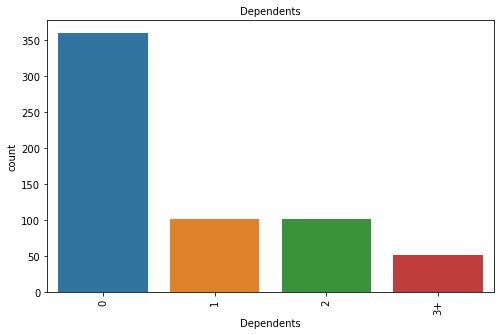

In [25]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Dependents")
plt.xticks(rotation=90)
plt.title("Dependents", fontsize = 10)

Here the People who have no dependent applying maximum loan than dependent.

Text(0.5, 1.0, 'Self_Employed')

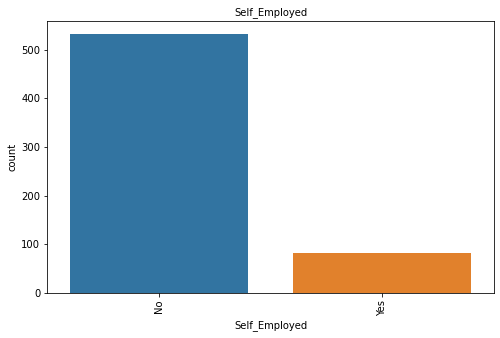

In [26]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Self_Employed")
plt.xticks(rotation=90)
plt.title("Self_Employed", fontsize = 10)

People who are not self_employed taking more loan rather than self_employed.

Text(0.5, 1.0, 'Loan_Amount_Term')

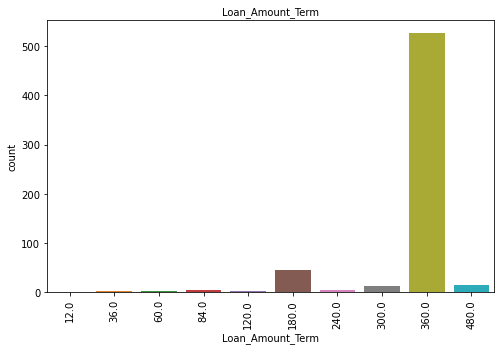

In [27]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Loan_Amount_Term")
plt.xticks(rotation=90)
plt.title("Loan_Amount_Term", fontsize = 10)

360 is the highest Loan_Amount_Term counted from given data.

Text(0.5, 1.0, 'Credit_History')

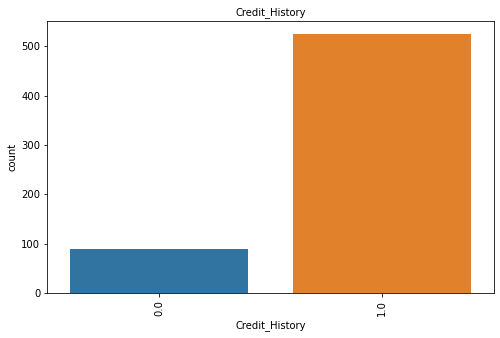

In [28]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Credit_History")
plt.xticks(rotation=90)
plt.title("Credit_History", fontsize = 10)

Applicant with credit history are far more likely to be accepted

Text(0.5, 1.0, 'Property_Area')

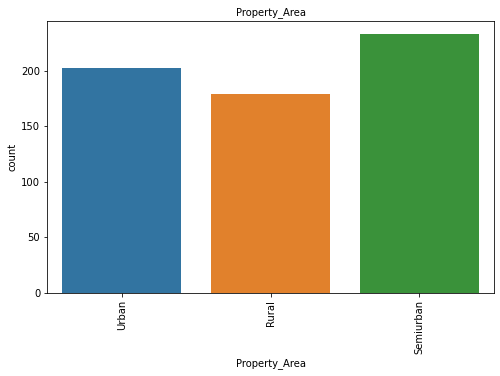

In [29]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Property_Area")
plt.xticks(rotation=90)
plt.title("Property_Area", fontsize = 10)

More applicants from Semi-urban and also likely to be granted loans

Text(0.5, 1.0, 'Loan_Status(Target Variable)')

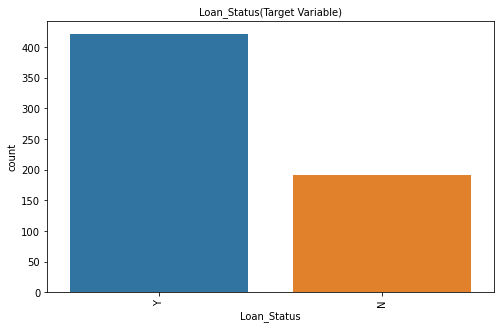

In [30]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Loan_Status")
plt.xticks(rotation=90)
plt.title("Loan_Status(Target Variable)", fontsize = 10)

According to given data maximum counts are Yes (Granted) the loan and approved the loan applications.

# Bivariate Analysis

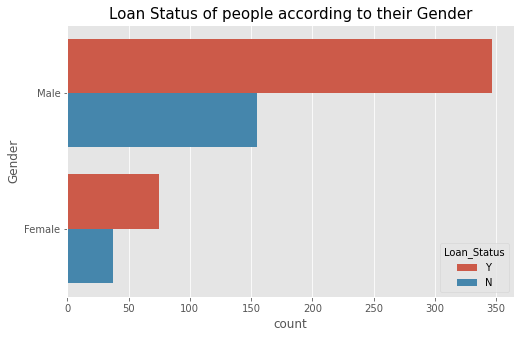

In [32]:
plt.style.use('ggplot')
plt.figure(figsize = (8,5))
plt.title("Loan Status of people according to their Gender", fontsize = 15)
sns.countplot(y = df['Gender'], hue = df['Loan_Status'])
plt.show()

As we can see Male are higher than Female and there are more chance grant the loan to male.

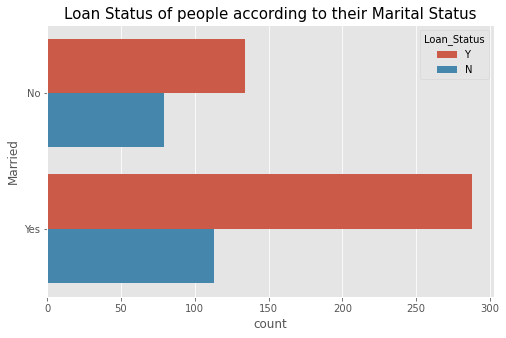

In [33]:
plt.style.use('ggplot')
plt.figure(figsize = (8,5))
plt.title("Loan Status of people according to their Marital Status", fontsize = 15)
sns.countplot(y = df['Married'], hue = df['Loan_Status'])
plt.show()

maximum people are married and they have more chance to get the loan.

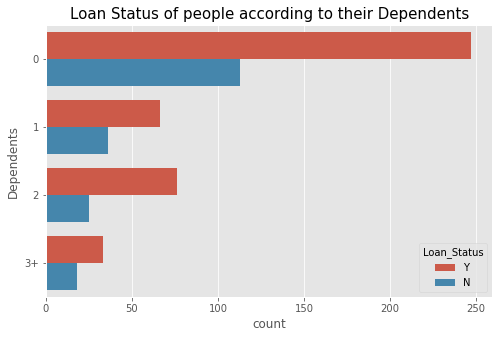

In [34]:
plt.style.use('ggplot')
plt.figure(figsize = (8,5))
plt.title("Loan Status of people according to their Dependents", fontsize = 15)
sns.countplot(y = df['Dependents'], hue = df['Loan_Status'])
plt.show()

The people have no dependent have more chance to get loan.

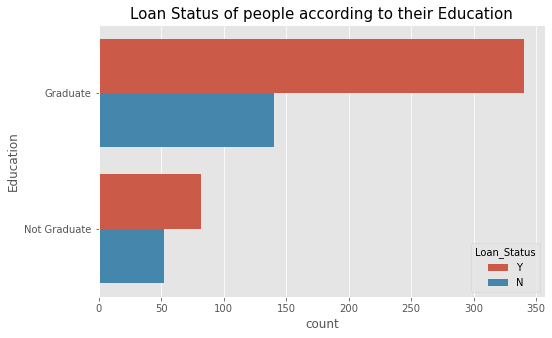

In [35]:
plt.style.use('ggplot')
plt.figure(figsize = (8,5))
plt.title("Loan Status of people according to their Education", fontsize = 15)
sns.countplot(y = df['Education'], hue = df['Loan_Status'])
plt.show()

The people who are graduate and they have more chance to get loan.

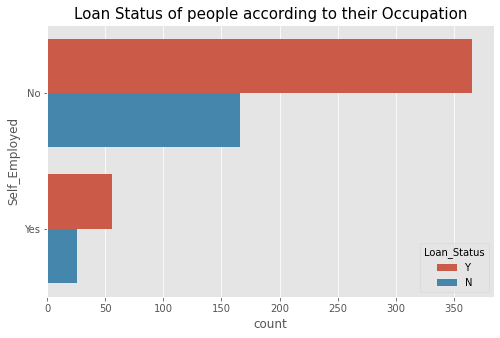

In [36]:
plt.style.use('ggplot')
plt.figure(figsize = (8,5))
plt.title("Loan Status of people according to their Occupation", fontsize = 15)
sns.countplot(y = df['Self_Employed'], hue = df['Loan_Status'])
plt.show()

People who are not self employed and they are doing job or Govt. Service have  more chance to get loan.

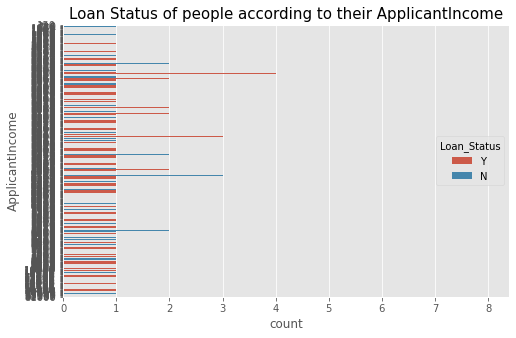

In [37]:
plt.style.use('ggplot')
plt.figure(figsize = (8,5))
plt.title("Loan Status of people according to their ApplicantIncome", fontsize = 15)
sns.countplot(y = df['ApplicantIncome'], hue = df['Loan_Status'])
plt.show()

If applicant income is high than more chance to get loan because risk is too low.  

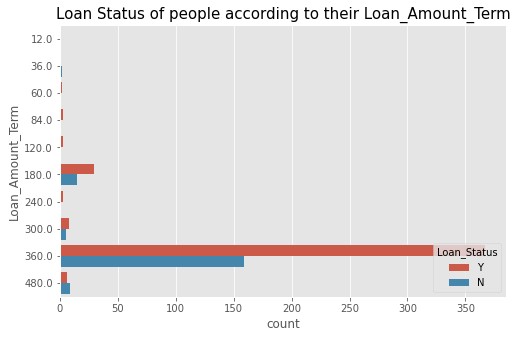

In [38]:
plt.style.use('ggplot')
plt.figure(figsize = (8,5))
plt.title("Loan Status of people according to their Loan_Amount_Term", fontsize = 15)
sns.countplot(y = df['Loan_Amount_Term'], hue = df['Loan_Status'])
plt.show()

360 is the highest count.

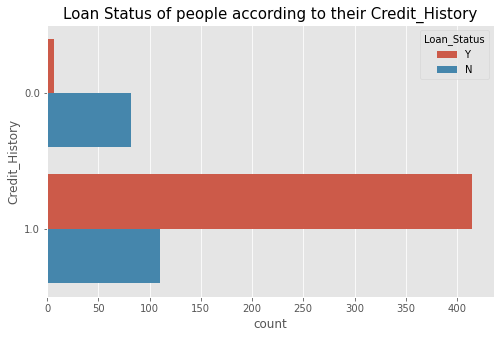

In [39]:
plt.style.use('ggplot')
plt.figure(figsize = (8,5))
plt.title("Loan Status of people according to their Credit_History", fontsize = 15)
sns.countplot(y = df['Credit_History'], hue = df['Loan_Status'])
plt.show()

If people have credit history so there are more chance to get loan.

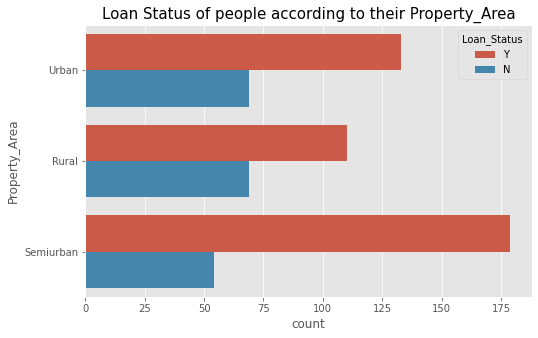

In [40]:
plt.style.use('ggplot')
plt.figure(figsize = (8,5))
plt.title("Loan Status of people according to their Property_Area", fontsize = 15)
sns.countplot(y = df['Property_Area'], hue = df['Loan_Status'])
plt.show()

Semiurban area have more chance to get loan.

# Feature Engg. with categorical columns

In [41]:
df_encoded = pd.get_dummies(df,drop_first=True)
df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1,1


# Ploting Outliers

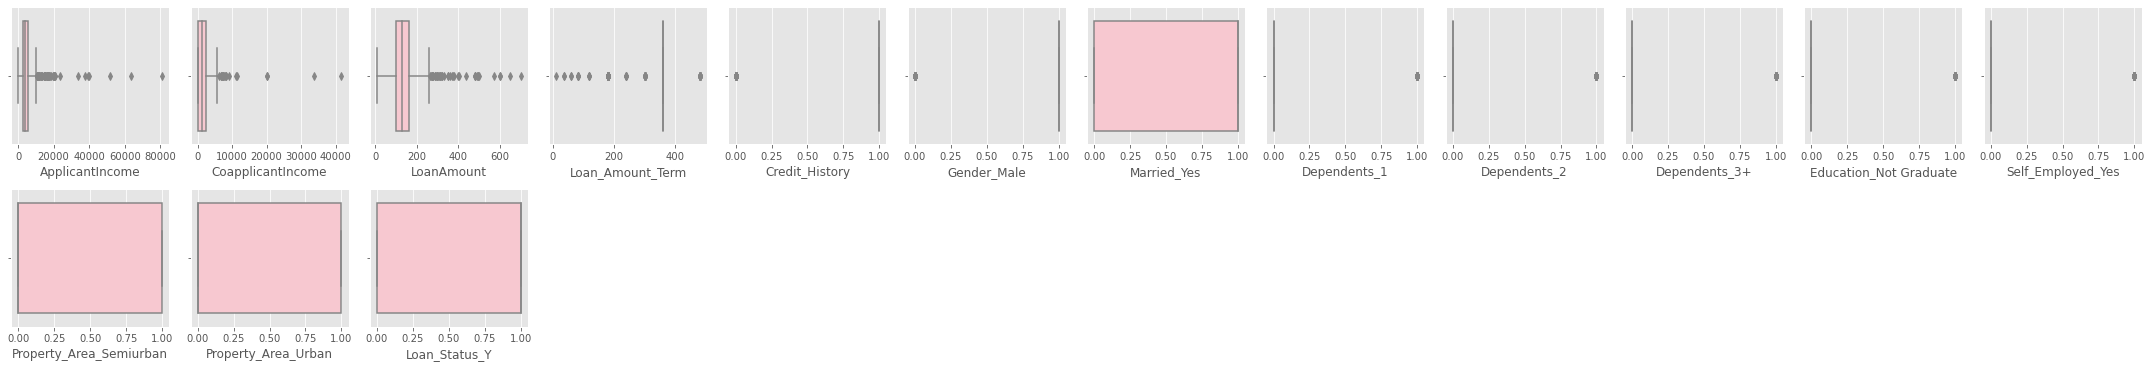

In [42]:
collist=df_encoded.columns.values
ncol=12
nrows=10
plt.figure(figsize=(30,25))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_encoded[collist[i]],color='Pink', orient='v')
    plt.tight_layout()

As we can see outlier are present is some columns

# Applying Zscore to remove outliers and cleaning data.

In [43]:
from scipy.stats import zscore
zabs = np.abs(zscore(df_encoded.loc[:,'ApplicantIncome':'CoapplicantIncome']))
print(np.shape(np.where(zabs>=3)))
df_new = df_encoded[(zabs<3).all(axis = 1)]
df_new

(2, 14)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106,0.0,40.000000,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072,240.0,253.000000,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,7583,0.0,187.000000,360.0,1.0,1,1,0,1,0,0,0,0,1,1


# Spliting the Independent and Target Variables.

In [44]:
x=df_new.drop('Loan_Status_Y',axis=1)
y=df_new['Loan_Status_Y']

# Data Scaling

In [45]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
dx=sc.fit_transform(x)
dx=pd.DataFrame(dx,columns=x.columns)
dx

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.275540,0.000000,0.214372,0.743590,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.214331,0.167929,0.185647,0.743590,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.137794,0.000000,0.088924,0.743590,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.117633,0.262584,0.173167,0.743590,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.282841,0.000000,0.205928,0.743590,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.132959,0.000000,0.096724,0.743590,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
596,0.191268,0.000000,0.048362,0.358974,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
597,0.383020,0.026726,0.380655,0.743590,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
598,0.359377,0.000000,0.277691,0.743590,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Data Imbalance

Text(0.5, 1.0, 'Loan_Status')

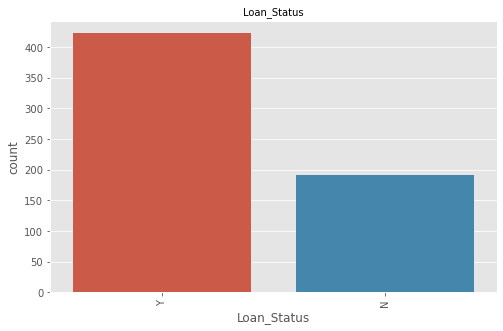

In [46]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Loan_Status")
plt.xticks(rotation=90)
plt.title("Loan_Status", fontsize = 10)

If the data is imbalanced, it can cause the overfitting and bias in the model prediction. So it is important to check and clear the data imbalance if present. We check the target variable to see if it is balanced or not.

In [47]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over, y_over=SM.fit_resample(dx,y)

As we are getting the data is imbalanced and knwo we are using SMOTE to balance the data.

In [48]:
#Converting target variable into DataFrame
y_over=pd.DataFrame(y_over)

In [49]:
X=x_over
y=y_over

In [50]:
#Checking shape after balancing the data.
print(X.shape,y.shape)

(830, 14) (830, 1)


# Finding best Random State for train test split.

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

max_accuracy = 0
best_rs = 0
for i in range(1, 150):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = i)
    lg = LogisticRegression()
    lg.fit(X_train, y_train)
    pred = lg.predict(X_test)
    acc = accuracy_score(y_test, pred)
    if acc > max_accuracy:
        max_accuracy = acc
        best_rs = i
print(f"Best Random State is {best_rs}, {max_accuracy*100}")

Best Random State is 69, 77.51004016064257


The Best Random State is 69, know we are spliting train or test according random state.

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=105)

# Importing Algorithms

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# LogisticRegression

In [54]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
pred_lg = lg.predict(X_test)
print(accuracy_score(y_test,pred_lg))
print(confusion_matrix(y_test,pred_lg))
print(classification_report(y_test,pred_lg))

0.7670682730923695
[[ 84  30]
 [ 28 107]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       114
           1       0.78      0.79      0.79       135

    accuracy                           0.77       249
   macro avg       0.77      0.76      0.77       249
weighted avg       0.77      0.77      0.77       249



# RandomForestClassifier

In [55]:
rf=RandomForestClassifier(n_estimators=100,random_state=49)
rf.fit(X_train,y_train)
predrf=rf.predict(X_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8232931726907631
[[ 94  20]
 [ 24 111]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       114
           1       0.85      0.82      0.83       135

    accuracy                           0.82       249
   macro avg       0.82      0.82      0.82       249
weighted avg       0.82      0.82      0.82       249



# DecisionTreeClassifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=None)
dtc.fit(X_train,y_train)
preddtc=dtc.predict(X_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7228915662650602
[[89 25]
 [44 91]]
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       114
           1       0.78      0.67      0.73       135

    accuracy                           0.72       249
   macro avg       0.73      0.73      0.72       249
weighted avg       0.73      0.72      0.72       249



# AdaBoostClassifier

In [57]:
ad=AdaBoostClassifier()
ad.fit(X_train,y_train) 
predad=ad.predict(X_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.7951807228915663
[[ 95  19]
 [ 32 103]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       114
           1       0.84      0.76      0.80       135

    accuracy                           0.80       249
   macro avg       0.80      0.80      0.79       249
weighted avg       0.80      0.80      0.80       249



# MultinomialNB

In [58]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train) 
pred_mnb=mnb.predict(X_test)
print(accuracy_score(y_test,pred_mnb))
print(confusion_matrix(y_test,pred_mnb))
print(classification_report(y_test,pred_mnb))

0.6546184738955824
[[89 25]
 [61 74]]
              precision    recall  f1-score   support

           0       0.59      0.78      0.67       114
           1       0.75      0.55      0.63       135

    accuracy                           0.65       249
   macro avg       0.67      0.66      0.65       249
weighted avg       0.68      0.65      0.65       249



# KNeighborsClassifier

In [59]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
predknn=knn.predict(X_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7751004016064257
[[ 86  28]
 [ 28 107]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       114
           1       0.79      0.79      0.79       135

    accuracy                           0.78       249
   macro avg       0.77      0.77      0.77       249
weighted avg       0.78      0.78      0.78       249



# Spport Vector Classifier

In [60]:
svc=SVC()
svc.fit(X_train,y_train) 
pred_svc=svc.predict(X_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.7911646586345381
[[ 81  33]
 [ 19 116]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       114
           1       0.78      0.86      0.82       135

    accuracy                           0.79       249
   macro avg       0.79      0.78      0.79       249
weighted avg       0.79      0.79      0.79       249



Best accuracy score is given by Random Forest Classifier model.

# Cross Validation

As we know the Random Forest Classifier is given hight score but we are Cross validating the models to see thre are underfitting or overfitting present or not.

In [61]:
from sklearn.model_selection import cross_val_score

lg_scores = cross_val_score(lg, X, y, cv = 5)
print(lg_scores)
print(f"Mean of accuracy scores is for Logistic Regression is {lg_scores.mean()*100}\n")

rf_scores = cross_val_score(rf, X, y, cv = 5)
print(rf_scores)
print(f"Mean of accuracy scores is for Random Forest Classifier is {rf_scores.mean()*100}\n")

dtc_scores = cross_val_score(dtc, X, y, cv = 5)
print(dtc_scores)
print(f"Mean of accuracy scores is for Decision Tree Classifier is {dtc_scores.mean()*100}\n")

ad_scores = cross_val_score(ad, X, y, cv = 5)
print(ad_scores)
print(f"Mean of accuracy scores is for ADA Boost Classifier is {ad_scores.mean()*100}\n")

mnb_scores = cross_val_score(mnb, X, y, cv = 5)
print(mnb_scores)
print(f"Mean of accuracy scores is for MultinomialNB is {mnb_scores.mean()*100}\n")

knn_scores = cross_val_score(knn, X, y, cv = 5)
print(knn_scores)
print(f"Mean of accuracy scores is for KNN Classifier is {knn_scores.mean()*100}\n")

svc_scores = cross_val_score(svc, X, y, cv = 5)
print(svc_scores)
print(f"Mean of accuracy scores is for SVC Classifier is {svc_scores.mean()*100}\n")

[0.68674699 0.74096386 0.6746988  0.71084337 0.72289157]
Mean of accuracy scores is for Logistic Regression is 70.72289156626506

[0.78313253 0.80120482 0.84939759 0.8373494  0.86746988]
Mean of accuracy scores is for Random Forest Classifier is 82.7710843373494

[0.71686747 0.77108434 0.75301205 0.75903614 0.74096386]
Mean of accuracy scores is for Decision Tree Classifier is 74.81927710843375

[0.69879518 0.73493976 0.71686747 0.77108434 0.71686747]
Mean of accuracy scores is for ADA Boost Classifier is 72.77108433734941

[0.56024096 0.68674699 0.62048193 0.62650602 0.64457831]
Mean of accuracy scores is for MultinomialNB is 62.77108433734939

[0.71084337 0.75903614 0.79518072 0.73493976 0.78313253]
Mean of accuracy scores is for KNN Classifier is 75.66265060240964

[0.68072289 0.69277108 0.6626506  0.71084337 0.70481928]
Mean of accuracy scores is for SVC Classifier is 69.03614457831326



After applying cross validation on all algorithms, know we have Mean accuracy score without overffiting or underffiting.

# Hyper parameter tuning

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
rf = RandomForestClassifier()
grid_parameters = dict()
grid_parameters['criterion'] = ['gini', 'entropy']
grid_parameters['n_estimators'] = [1, 2, 4, 8, 10, 16, 32, 64, 100, 200]
grid_parameters['min_samples_split'] = [1,2,5,8,10,15,20,25,50,55,60,80,100]
grid_sr = GridSearchCV(estimator=rf,param_grid=grid_parameters,scoring='accuracy', cv=5)
grid_sr.fit(X_train, y_train)
best_parameters=grid_sr.best_params_
best_result=grid_sr.best_score_
best_model = grid_sr.best_estimator_
print(best_parameters)
print(best_result)
print(best_model)

{'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 100}
0.8244326554671382
RandomForestClassifier(criterion='entropy')


After the hyperparameter tuning, the best parameters for Random Forest Classifier are 'crietrion' = 'entropy', 'min_samples_split' = 2, 'n_estimators' = 100. Know we are building the model with these parameters.

In [64]:
RF = RandomForestClassifier(criterion = 'gini', min_samples_split = 2, n_estimators = 100)
RF.fit(X_train, y_train)
print(RF.score(X_train, y_train))
pred_rf = RF.predict(X_test)

1.0


The score is highest with the best parameters.

# Model Evaluation

# Metrics

In [65]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [66]:
#Import ROC_AUC_SCORE.
from sklearn.metrics import roc_auc_score

In [67]:
y_pred_prob=RF.predict_proba(X_test)[:,1]
y_pred_prob

array([0.67, 0.7 , 0.75, 0.97, 0.81, 0.66, 0.44, 0.29, 0.54, 0.78, 0.11,
       0.57, 0.86, 0.53, 0.64, 0.81, 0.36, 0.02, 0.1 , 0.71, 0.06, 0.04,
       0.86, 0.75, 0.03, 0.84, 0.42, 0.41, 0.29, 0.44, 0.55, 0.74, 0.  ,
       0.23, 0.94, 0.62, 0.64, 0.62, 0.37, 0.53, 0.73, 0.85, 0.95, 0.25,
       0.79, 0.05, 0.82, 0.13, 0.02, 0.69, 0.64, 0.04, 0.89, 0.58, 0.77,
       0.03, 0.06, 0.45, 0.4 , 0.44, 0.06, 0.54, 0.87, 0.49, 0.92, 0.64,
       0.75, 0.11, 0.6 , 0.08, 0.42, 0.74, 0.71, 0.1 , 0.14, 0.85, 0.26,
       0.3 , 0.94, 0.02, 0.03, 0.13, 0.03, 0.25, 0.06, 0.66, 0.05, 0.9 ,
       0.93, 0.91, 0.3 , 0.02, 0.39, 0.06, 0.86, 0.73, 0.12, 0.08, 0.76,
       0.84, 0.06, 0.1 , 0.27, 0.81, 0.32, 0.85, 0.02, 0.77, 0.08, 0.49,
       0.47, 0.96, 0.59, 0.71, 0.46, 0.47, 0.75, 0.91, 0.53, 0.03, 0.04,
       0.79, 0.71, 0.14, 0.06, 0.81, 0.34, 0.09, 0.29, 0.95, 0.54, 0.37,
       0.03, 0.05, 0.94, 0.74, 0.85, 0.95, 0.86, 0.48, 0.64, 0.12, 0.25,
       0.78, 0.16, 0.75, 0.33, 0.51, 0.48, 0.6 , 0.

In [68]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [69]:
fpr

array([0.        , 0.        , 0.        , 0.00877193, 0.01754386,
       0.01754386, 0.01754386, 0.01754386, 0.01754386, 0.01754386,
       0.01754386, 0.01754386, 0.01754386, 0.02631579, 0.02631579,
       0.02631579, 0.03508772, 0.03508772, 0.03508772, 0.03508772,
       0.04385965, 0.04385965, 0.04385965, 0.05263158, 0.05263158,
       0.07017544, 0.07017544, 0.07017544, 0.07017544, 0.07017544,
       0.07017544, 0.07894737, 0.07894737, 0.0877193 , 0.0877193 ,
       0.0877193 , 0.09649123, 0.10526316, 0.10526316, 0.10526316,
       0.10526316, 0.13157895, 0.14035088, 0.15789474, 0.15789474,
       0.18421053, 0.20175439, 0.20175439, 0.21052632, 0.21052632,
       0.23684211, 0.24561404, 0.24561404, 0.26315789, 0.28070175,
       0.28070175, 0.28947368, 0.29824561, 0.29824561, 0.31578947,
       0.34210526, 0.35964912, 0.37719298, 0.38596491, 0.40350877,
       0.4122807 , 0.4122807 , 0.42982456, 0.44736842, 0.47368421,
       0.51754386, 0.55263158, 0.57894737, 0.63157895, 0.67543

In [70]:
tpr

array([0.        , 0.00740741, 0.02222222, 0.04444444, 0.05925926,
       0.08888889, 0.0962963 , 0.11851852, 0.13333333, 0.15555556,
       0.17037037, 0.20740741, 0.23703704, 0.25185185, 0.25925926,
       0.2962963 , 0.31111111, 0.32592593, 0.35555556, 0.37777778,
       0.42222222, 0.46666667, 0.48888889, 0.51111111, 0.51851852,
       0.54074074, 0.55555556, 0.56296296, 0.59259259, 0.61481481,
       0.62222222, 0.65925926, 0.66666667, 0.6962963 , 0.7037037 ,
       0.72592593, 0.73333333, 0.73333333, 0.74074074, 0.75555556,
       0.76296296, 0.77777778, 0.8       , 0.81481481, 0.82222222,
       0.82222222, 0.82962963, 0.84444444, 0.85185185, 0.85925926,
       0.88148148, 0.88888889, 0.8962963 , 0.8962963 , 0.92592593,
       0.93333333, 0.93333333, 0.94074074, 0.94814815, 0.94814815,
       0.94814815, 0.94814815, 0.95555556, 0.95555556, 0.96296296,
       0.96296296, 0.97037037, 0.97037037, 0.97037037, 0.97037037,
       0.97037037, 0.97037037, 0.98518519, 0.98518519, 0.99259

In [71]:
thresholds

array([2.  , 1.  , 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 , 0.89, 0.87,
       0.86, 0.85, 0.84, 0.82, 0.81, 0.8 , 0.79, 0.78, 0.77, 0.76, 0.75,
       0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.67, 0.66, 0.65, 0.64, 0.63,
       0.62, 0.61, 0.6 , 0.59, 0.58, 0.57, 0.56, 0.55, 0.54, 0.53, 0.51,
       0.5 , 0.49, 0.48, 0.47, 0.46, 0.45, 0.44, 0.42, 0.41, 0.39, 0.36,
       0.35, 0.34, 0.33, 0.32, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.23,
       0.21, 0.16, 0.14, 0.13, 0.12, 0.11, 0.1 , 0.08, 0.07, 0.06, 0.05,
       0.04, 0.02, 0.01, 0.  ])

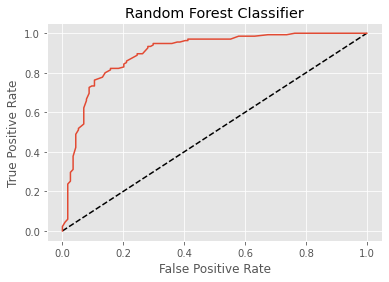

In [72]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [73]:
auc_score=roc_auc_score(y_test,RF.predict(X_test))
print(auc_score)

0.8284600389863548


AUC_ROC_Score is 82 which is very good score.

In [74]:
from sklearn import metrics

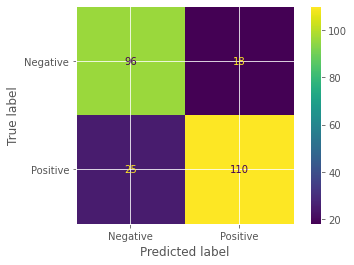

In [75]:
metrics.plot_confusion_matrix(RF, X_test, y_test, display_labels=['Negative', 'Positive'])

# Saving Model

In [76]:
import joblib
joblib.dump(RF,'Loan_Application_Prediction.obj')

['Loan_Application_Prediction.obj']